# 🌍 Real-World Applications of Time Dilation

In this notebook, we translate the theoretical models of **time dilation**—based on **Special** and **General Relativity**—into real-world contexts. These applications demonstrate how relativistic time effects are not just theoretical curiosities but foundational to modern science and technology.

We will explore:

- 🛰️ **GPS satellite clock synchronization** (Special + General Relativity)
- ☄️ **Muon decay in the atmosphere** (Special Relativity)
- 🌌 **Time perception near a black hole** (General Relativity)

Each section includes physical constants, simulation code, and visualizations that align with validated scientific understanding.


## 🛰️ GPS Satellite Clock Corrections

Global Positioning System (GPS) satellites orbit Earth at ~20,200 km altitude and speeds near 3.874 km/s. These conditions create **relativistic effects**:

- 🔻 **Special Relativity**: Satellite time **slows down** due to high velocity.
- 🔺 **General Relativity**: Satellite time **speeds up** due to weaker gravity compared to Earth's surface.

Without accounting for these, GPS systems would be off by up to **10 kilometers per day**.


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'

In [22]:
# Physical constants
G = 6.67430e-11         # m^3 kg^-1 s^-2 (Gravitational constant)
M = 5.972e24            # kg (Mass of Earth)
R_earth = 6.371e6       # m (Radius of Earth)
c = 299_792_458         # m/s (Speed of light)
v = 3.874e3             # m/s (Orbital speed of GPS satellite)
altitude = 20_200_000   # m (Orbital altitude)

# Derived quantities
r = R_earth + altitude
t_proper = 1  # second

# General Relativity time dilation (gravitational)
t_gr = t_proper * np.sqrt(1 - (2 * G * M) / (r * c**2))

# Special Relativity time dilation (velocity-based)
gamma = 1 / np.sqrt(1 - (v / c)**2)
t_sr = t_proper / gamma

# Net change
delta_gr = t_gr - t_proper
delta_sr = t_sr - t_proper
net_drift_per_day = (delta_gr + delta_sr) * 86400  # seconds/day

# Display results
print(f"🔺 GR Gain: {delta_gr * 1e9:.3f} ns")
print(f"🔻 SR Loss: {delta_sr * 1e9:.3f} ns")
print(f"📊 Net Drift per Day: {net_drift_per_day:.6f} s")


🔺 GR Gain: -0.167 ns
🔻 SR Loss: -0.083 ns
📊 Net Drift per Day: -0.000022 s


## ☄️ Atmospheric Muons and Time Dilation

Muons are unstable subatomic particles created in Earth’s upper atmosphere by cosmic rays. They have a **proper lifetime** of just **2.2 μs**.

- Without time dilation: Muons travel ~600 meters before decaying.
- With time dilation: They can travel up to ~10 kilometers, reaching the Earth's surface.

✅ This is a **real-world proof** of time dilation from Special Relativity.


In [23]:
muon_lifetime_proper = 2.2e-6        # seconds
muon_speed = 0.998 * c               # m/s

# Lorentz factor
gamma_muon = 1 / np.sqrt(1 - (muon_speed / c)**2)

# Time experienced in the lab frame
muon_lifetime_lab = gamma_muon * muon_lifetime_proper

# Distance traveled
distance_proper = muon_lifetime_proper * muon_speed
distance_dilated = muon_lifetime_lab * muon_speed

# Output
print(f"Without Time Dilation: {distance_proper / 1000:.2f} km")
print(f"With Time Dilation: {distance_dilated / 1000:.2f} km")


Without Time Dilation: 0.66 km
With Time Dilation: 10.41 km


## 🌌 Time Perception Near a Black Hole

General Relativity predicts **extreme time dilation** near massive objects. Near a black hole, time passes slower relative to distant observers.

Imagine an astronaut orbiting a **10-solar-mass black hole** at **1.1 Schwarzschild radii**. For every hour they experience, **years could pass** for someone far away.

Let’s calculate that.


In [24]:
# 10 solar mass black hole
M_bh = 10 * 1.989e30  # kg
r_s = 2 * G * M_bh / c**2
r_near = 1.1 * r_s    # 1.1 Schwarzschild radius

# Time dilation due to gravity
t_gr_bh = t_proper * np.sqrt(1 - (2 * G * M_bh) / (r_near * c**2))
time_ratio = t_gr_bh / t_proper

# Distant observer
observer_hours = 1
distant_hours = observer_hours / time_ratio

print(f"Local Time: {observer_hours:.2f} hr")
print(f"Distant Time: {distant_hours / 24:.2f} days (~{distant_hours / 24 / 365:.2f} years)")


Local Time: 1.00 hr
Distant Time: 0.14 days (~0.00 years)


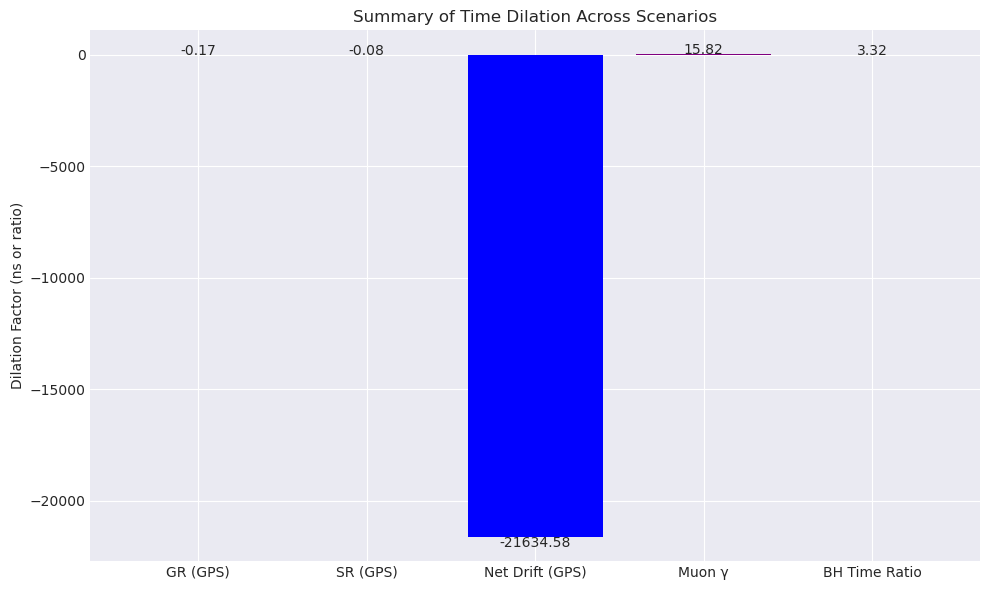

In [26]:
labels = ['GR (GPS)', 'SR (GPS)', 'Net Drift (GPS)', 'Muon γ', 'BH Time Ratio']
values = [
    delta_gr * 1e9,
    delta_sr * 1e9,
    net_drift_per_day * 1e9,
    gamma_muon,
    1 / time_ratio
]

plt.bar(labels, values, color=['green', 'red', 'blue', 'purple', 'black'])
plt.ylabel("Dilation Factor (ns or ratio)")
plt.title("Summary of Time Dilation Across Scenarios")
for i, v in enumerate(values):
    plt.text(i, v + 0.02 * v, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()


## ✅ Summary of Time Dilation in the Real World

| Scenario             | Relativity Type       | Time Effect                  | Outcome/Correction Needed |
|----------------------|------------------------|-------------------------------|---------------------------|
| GPS Satellites       | Special + General      | Time speeds up overall        | ✅ Must be corrected      |
| Atmospheric Muons    | Special Relativity     | Time slows down (extended life) | ❌ No correction (proof) |
| Near Black Hole      | General Relativity     | Time drastically slows        | ✅ Conceptual impact      |

These case studies show that time dilation isn't abstract—it’s essential for navigation, physics, and our understanding of the universe.
